### Guided Project: Finding the Best Markets to Advertise In


Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
survey_df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
survey_df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [6]:
survey_df.shape

(18175, 136)

In [7]:
survey_df['JobRoleInterest'].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                   

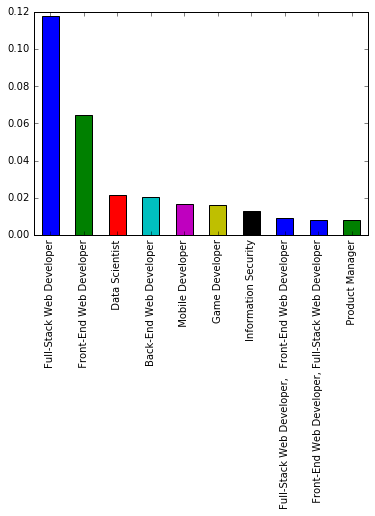

In [8]:
survey_df['JobRoleInterest'].value_counts(normalize=True).head(10).plot.bar()

In [9]:
# Looks like lot of folks are interested in more than one subject,
# lets see how many are interested in one vs more than one subject


In [10]:
survey_df_no_nulls = survey_df[survey_df['JobRoleInterest'].notna()].copy()
survey_df_no_nulls['JobRoleInterestLength'] = (survey_df_no_nulls['JobRoleInterest']\
                                      .apply(lambda x: 2 if len(x.split(',')) > 1 else 1)
                                     )

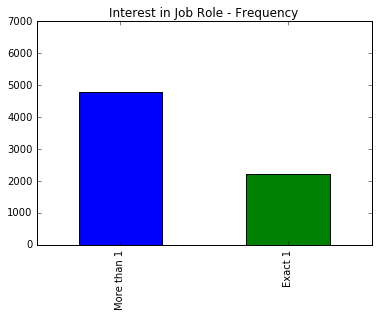

In [11]:
survey_df_no_nulls['JobRoleInterestLength'].value_counts().plot.bar()
plt.xticks([0, 1], ['More than 1', 'Exact 1'])
plt.ylim(0, len(survey_df_no_nulls))
plt.title('Interest in Job Role - Frequency')
plt.show()

In [12]:
# Find how many people are interested in either Web or Mobile Development course
# Web development contains full stack, backend, frontend etc
# so we will search for string.contains('web development' or 'mobile developemnt')

In [13]:
survey_df_no_nulls['web_or_mobile'] = (survey_df_no_nulls['JobRoleInterest']
                              .apply(lambda x: 'Web|Mobile' if(('web develop' in x.lower()) or ('mobile develop' in x.lower())) else 'Other Subjects')
                             )

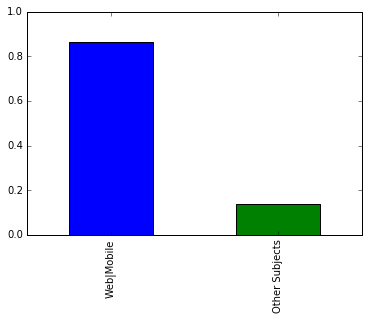

In [14]:
survey_df_no_nulls['web_or_mobile'].value_counts(normalize=True).plot.bar()
plt.ylim(0.0, 1.0)
plt.show()

In [15]:
# Looks like lot of people are interested in either web or mobile developer courses

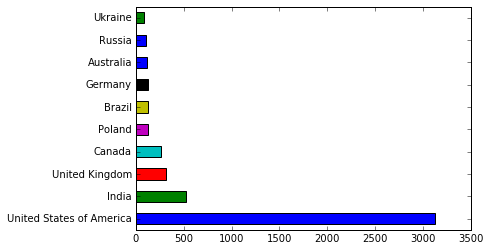

In [16]:
survey_df_no_nulls['CountryLive'].value_counts().head(10).plot.barh()
plt.show()

In [17]:
survey_df_no_nulls['CountryLive'].value_counts(normalize=True).head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

In [18]:
# Top 4 countries interested in learning are USA, India, UK and Canada

we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [19]:
survey_df_no_nulls['MonthsProgramming'].replace(0, 1, inplace=True)

In [20]:
survey_df_no_nulls['money_spent'] = survey_df_no_nulls['MoneyForLearning'] / survey_df_no_nulls['MonthsProgramming']

In [21]:
survey_df_no_nulls.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterestLength,web_or_mobile,money_spent
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Web|Mobile,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Web|Mobile,0.000000


In [22]:
(survey_df_no_nulls
 .groupby('CountryLive')
 .mean()['money_spent']
 .loc[['India', 'Canada', 'United Kingdom', 'United States of America']]
 .sort_values(ascending=False)
)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_spent, dtype: float64

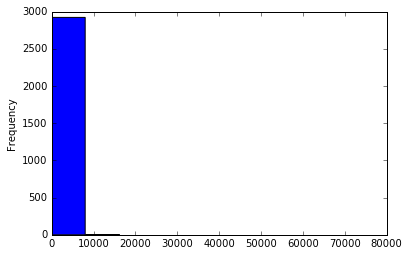

In [33]:
usa = survey_df_no_nulls[survey_df_no_nulls['CountryLive'] == 'United States of America']
usa['money_spent'].plot.hist()
plt.show()

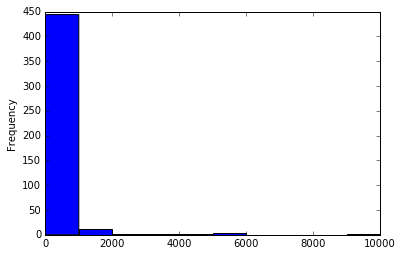

In [30]:
india = survey_df_no_nulls[survey_df_no_nulls['CountryLive'] == 'India']
india['money_spent'].plot.hist()
plt.show()

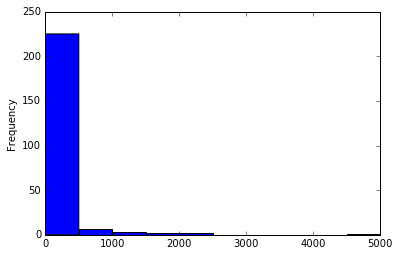

In [31]:
canada = survey_df_no_nulls[survey_df_no_nulls['CountryLive'] == 'Canada']
canada['money_spent'].plot.hist()
plt.show()

In [34]:
# There are definitely outliers, lets check via boxplots

In [38]:
countries = ['United States of America', 'India', 'Canada', 'United Kingdom']
final_df = pd.DataFrame()

for country in countries:
    df = survey_df_no_nulls[survey_df_no_nulls['CountryLive'] == country]
    final_df = final_df.append(df)

In [40]:
final_df['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

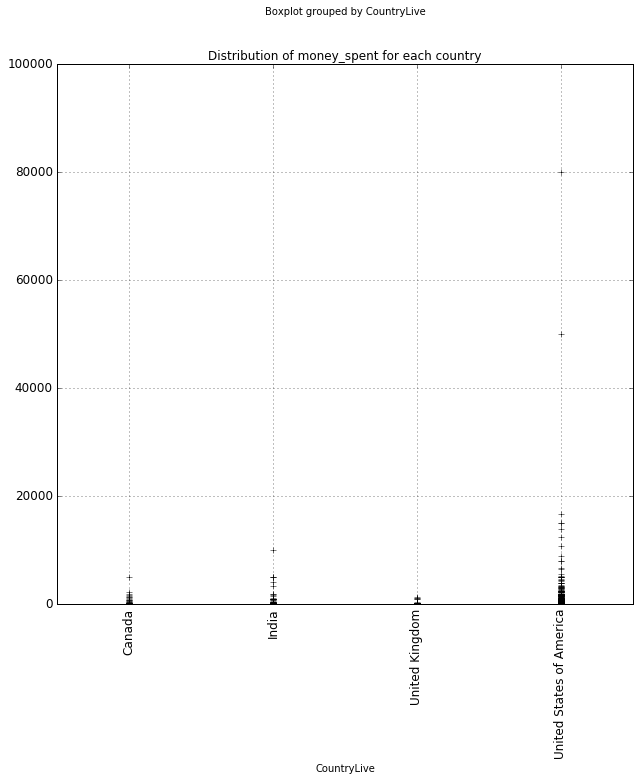

In [66]:
final_df.boxplot(column = 'money_spent', by = 'CountryLive', fontsize='large', rot=90, figsize=(10, 10))
plt.title('Distribution of money_spent for each country')
plt.ylim(0, 100000)
plt.show()

In [67]:
# For US, there arae couple of extreme outliers, 
# Around 80k and 50k spent more month

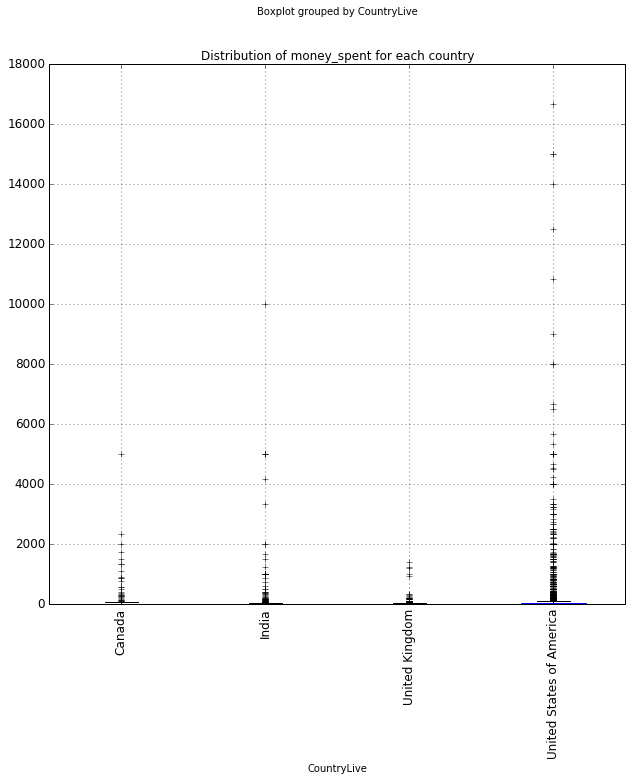

In [74]:
final_df.loc[final_df['money_spent'] < 40000].boxplot(column = 'money_spent', by = 'CountryLive', fontsize='large', rot=90, figsize=(10, 10))
plt.title('Distribution of money_spent for each country')
plt.show()

In [73]:
# calculate mean again

(final_df
 .loc[final_df['money_spent'] < 40000]
 .groupby('CountryLive')
 .mean()['money_spent']
 .loc[['India', 'Canada', 'United Kingdom', 'United States of America']]
 .sort_values(ascending=False)
)

CountryLive
United States of America    155.459187
India                       113.748387
Canada                      113.510961
United Kingdom               45.534443
Name: money_spent, dtype: float64

In [75]:
# After removing the two outliers, mean of US came down drastically to
# 183 from 227

In [79]:
# india outliers
india_outliers = final_df[(final_df['CountryLive'] == 'India') & (final_df['money_spent'] > 2000)]
india_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterestLength,web_or_mobile,money_spent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2,Web|Mobile,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2,Web|Mobile,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Web|Mobile,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2,Web|Mobile,4166.666667


In [80]:
# canada outliers
canada_outliers = final_df[(final_df['CountryLive'] == 'Canada') & (final_df['money_spent'] > 4000)]
canada_outliers
# attended the bootcamp, remove this outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterestLength,web_or_mobile,money_spent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,Web|Mobile,5000.0


In [81]:
# us outlier
us_outliers = final_df[(final_df['CountryLive'] == 'United States of America') & (final_df['money_spent'] > 10000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterestLength,web_or_mobile,money_spent
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,50000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,2,Web|Mobile,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,14000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,2,Web|Mobile,80000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,Web|Mobile,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Web|Mobile,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Web|Mobile,15000.000000


In [82]:
# remove the outliers
final_df = final_df.drop(canada_outliers.index)
final_df = final_df.drop(india_outliers.index)
final_df = final_df.drop(us_outliers.index)


In [83]:
final_df.shape

(4213, 139)

In [87]:
(final_df
 .groupby('CountryLive')
 .mean()['money_spent']
 .loc[['India', 'Canada', 'United Kingdom', 'United States of America']]
 .sort_values(ascending=False)
)

CountryLive
United States of America    76.018595
Canada                      63.958456
India                       62.333097
United Kingdom              34.468329
Name: money_spent, dtype: float64

In [88]:
# mean after removing the records that attended bootcamp
(final_df[final_df['AttendedBootcamp'] != 1]
 .groupby('CountryLive')
 .mean()['money_spent']
 .loc[['India', 'Canada', 'United Kingdom', 'United States of America']]
 .sort_values(ascending=False)
)

CountryLive
United States of America    76.018595
Canada                      63.958456
India                       62.333097
United Kingdom              34.468329
Name: money_spent, dtype: float64

### Conclusion:-
Average amount of money people are willing to spend per country

| Country  | Money Spent  |
|---|---|
| United States of America  | 76.018595  |
| Canada  | 63.958456  |
| India | 62.333097  |
| United Kingdom | 34.468329  |

Canada and India almost have similar avg money_spent values, it make sense to go ahead with India because of the larger audience.

It might also make sense to split advertising budget three ways
 - 100% to US
 - 70% US and 30% India
 - 70% US and 20% India, 10% Canada
 
Ideally, If we had a marketing team in our company it would be better to just send them the results and let them use their domain knowledge to make the best decision